In [1]:
import ROOT
import numpy as np
import uproot3
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import time

Welcome to JupyROOT 6.24/02


In [2]:
root_file = "dav10.root"
file = uproot3.open(root_file)

In [3]:
tree_truth = file['Truth_Vertex_PV_Selected;6']
tree_reco = file['Reco_Vertex;4']

In [4]:
branches_truth = tree_truth.arrays(namedecode='utf-8')
branches_reco = tree_reco.arrays(namedecode='utf-8')
branches_truth.keys(), branches_reco.keys()

(dict_keys(['event_id', 'truth_vtx_vx', 'truth_vtx_vy', 'truth_vtx_vz', 'truth_particle_Id', 'truth_particle_Type', 'truth_particle_process', 'truth_particle_vx', 'truth_particle_vy', 'truth_particle_vz', 'truth_particle_vt', 'truth_particle_p', 'truth_particle_px', 'truth_particle_py', 'truth_particle_pz', 'truth_particle_m', 'truth_particle_q', 'truth_particle_eta', 'truth_particle_phi', 'truth_particle_pt', 'truth_particle_vertexPrimary', 'truth_particle_vertexSecondary', 'truth_particle_particle', 'truth_particle_generation', 'truth_particle_subParticle', 'truth_vtx_fitted_trk_d0', 'truth_vtx_fitted_trk_z0', 'truth_vtx_fitted_trk_phi', 'truth_vtx_fitted_trk_theta', 'truth_vtx_fitted_trk_qp', 'truth_vtx_fitted_trk_time', 'truth_vtx_fitted_trk_err_d0', 'truth_vtx_fitted_trk_err_z0', 'truth_vtx_fitted_trk_err_phi', 'truth_vtx_fitted_trk_err_theta', 'truth_vtx_fitted_trk_err_qp', 'truth_vtx_fitted_trk_err_time', 'truth_vtx_fitted_trk_vtxID']),
 dict_keys(['event_id', 'reco_vtx_vx', 're

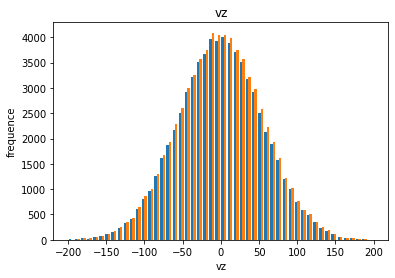

In [5]:
plt.hist([branches_truth['truth_vtx_vz'].flatten(), 
          branches_reco['reco_vtx_vz'].flatten()]  , bins=50, range=(-200, 200))
#, bins=100, range=(0, 100), histtype='step', label='number of vertex'
plt.title('vz')
plt.xlabel('vz')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [6]:
start = time.time()

# define variables
event_size = 10000
truth_d0, truth_z0, truth_phi, truth_theta, truth_qp, truth_trk_vtxid = branches_truth['truth_vtx_fitted_trk_d0'], branches_truth['truth_vtx_fitted_trk_z0'], branches_truth['truth_vtx_fitted_trk_phi'], branches_truth['truth_vtx_fitted_trk_theta'], branches_truth['truth_vtx_fitted_trk_qp'], branches_truth['truth_vtx_fitted_trk_vtxID']
reco_d0, reco_z0, reco_phi, reco_theta, reco_qp, reco_trk_vtxid  = branches_reco['reco_vtx_fitted_trk_d0'], branches_reco['reco_vtx_fitted_trk_z0'], branches_reco['reco_vtx_fitted_trk_phi'], branches_reco['reco_vtx_fitted_trk_theta'], branches_reco['reco_vtx_fitted_trk_qp'], branches_reco['reco_vtx_fitted_trk_vtxID']
truth_trk_info, reco_trk_info, truth_match_matrix = [], [], []

# reshape the data into shape(:, 5)
for i in range(event_size):
    num_trk_truth = np.bincount(truth_trk_vtxid[i])
    truth_trk_info_tmp = np.vstack([truth_d0[i], truth_z0[i], truth_phi[i], truth_theta[i], truth_qp[i]]).transpose()
    truth_trk_info_tmp = np.split(truth_trk_info_tmp, np.cumsum(num_trk_truth))
    truth_trk_info_tmp = truth_trk_info_tmp[:-1]
    truth_trk_info.append(truth_trk_info_tmp)
    
    num_trk_reco = np.bincount(reco_trk_vtxid[i])
    reco_trk_info_tmp = np.vstack([reco_d0[i], reco_z0[i], reco_phi[i], reco_theta[i], reco_qp[i]]).transpose()
    reco_trk_info_tmp = np.split(reco_trk_info_tmp, np.cumsum(num_trk_reco))
    reco_trk_info_tmp = reco_trk_info_tmp[:-1]
    reco_trk_info.append(reco_trk_info_tmp)
    
    match_matrix = np.zeros((len(truth_trk_info_tmp), len(reco_trk_info_tmp)))
    for j in range(len(truth_trk_info_tmp)):
        for k in range(len(reco_trk_info_tmp)):
            match_matrix[j, k] = len([x for x in set(tuple(x) for x in truth_trk_info_tmp[j]) & set(tuple(x) for x in reco_trk_info_tmp[k])])/len(truth_trk_info_tmp[j])
            
    truth_match_matrix.append(match_matrix)

    

end = time.time()
print(end-start, 'seconds')

45.10468578338623 seconds


mean_event= 0.9934409229049306
standard deviation_event= 0.027140979659441435


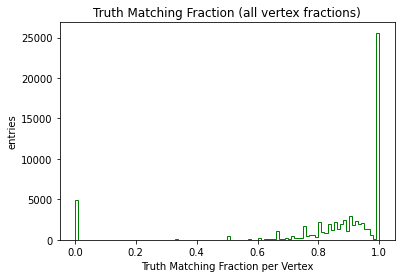

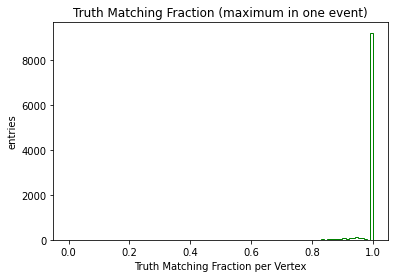

time_elapsed 0.9737212657928467 seconds


In [7]:
time_start = time.time()
fig_vtx, ax_vtx = plt.subplots()
fig_event, ax_event = plt.subplots()

m_event, m_vtx = [], []
for l in range(len(truth_match_matrix)):
    m_event.append(np.amax(truth_match_matrix[l]))
    for j in range(len(truth_match_matrix[l])):
        m_vtx.append(max(truth_match_matrix[l][j]))
        
(mean, stadev) = norm.fit(m_event)
print('mean_event=', mean)
print('standard deviation_event=', stadev)
bin = np.linspace(0, 1, 101)
ax_event.hist(m_event, bins=bin, color='green', histtype='step', label='number of vertex')
ax_vtx.hist(m_vtx, bins=bin, color='green', histtype='step')

ax_event.set_title('Truth Matching Fraction (maximum in one event)')
ax_vtx.set_title('Truth Matching Fraction (all vertex fractions)')

ax_event.set_xlabel("Truth Matching Fraction per Vertex")
ax_event.set_ylabel("entries")

ax_vtx.set_xlabel("Truth Matching Fraction per Vertex")
ax_vtx.set_ylabel("entries")

plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [8]:
def array_row_intersection(a,b):
    tmp=np.prod(np.swapaxes(a[:,:,None],1,2)==b,axis=2)
    return a[np.sum(np.cumsum(tmp,axis=0)*tmp==1,axis=1).astype(bool)]
start = time.time()

# define variables
event_size = 10000
truth_d0, truth_z0, truth_phi, truth_theta, truth_qp, truth_trk_vtxid = branches_truth['truth_vtx_fitted_trk_d0'], branches_truth['truth_vtx_fitted_trk_z0'], branches_truth['truth_vtx_fitted_trk_phi'], branches_truth['truth_vtx_fitted_trk_theta'], branches_truth['truth_vtx_fitted_trk_qp'], branches_truth['truth_vtx_fitted_trk_vtxID']
reco_d0, reco_z0, reco_phi, reco_theta, reco_qp, reco_trk_vtxid  = branches_reco['reco_vtx_fitted_trk_d0'], branches_reco['reco_vtx_fitted_trk_z0'], branches_reco['reco_vtx_fitted_trk_phi'], branches_reco['reco_vtx_fitted_trk_theta'], branches_reco['reco_vtx_fitted_trk_qp'], branches_reco['reco_vtx_fitted_trk_vtxID']
truth_trk_info, reco_trk_info, truth_match_matrix = [], [], []

# reshape the data into shape(:, 5)
for i in range(event_size):
    num_trk_truth = np.bincount(truth_trk_vtxid[i])
    truth_trk_info_tmp = np.vstack([truth_d0[i], truth_z0[i], truth_phi[i], truth_theta[i], truth_qp[i]]).transpose()
    truth_trk_info_tmp = np.split(truth_trk_info_tmp, np.cumsum(num_trk_truth))
    truth_trk_info_tmp = truth_trk_info_tmp[:-1]
    
    truth_trk_info.append(truth_trk_info_tmp)
    
    num_trk_reco = np.bincount(reco_trk_vtxid[i])
    reco_trk_info_tmp = np.vstack([reco_d0[i], reco_z0[i], reco_phi[i], reco_theta[i], reco_qp[i]]).transpose()
    reco_trk_info_tmp = np.split(reco_trk_info_tmp, np.cumsum(num_trk_reco))
    reco_trk_info_tmp = reco_trk_info_tmp[:-1]
    
    reco_trk_info.append(reco_trk_info_tmp)
    
    match_matrix = np.zeros((len(truth_trk_info_tmp), len(reco_trk_info_tmp)))
    for j in range(len(truth_trk_info_tmp)):
        for k in range(len(reco_trk_info_tmp)):
            match_matrix[j, k] = len(array_row_intersection(truth_trk_info_tmp[j], reco_trk_info_tmp[k]))/len(truth_trk_info_tmp[j])
            
    truth_match_matrix.append(match_matrix)

    
end = time.time()
print(end-start, 'seconds')

33.85683345794678 seconds


mean_event= 0.9934409229049306
standard deviation_event= 0.027140979659441435


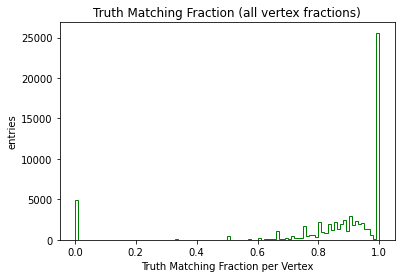

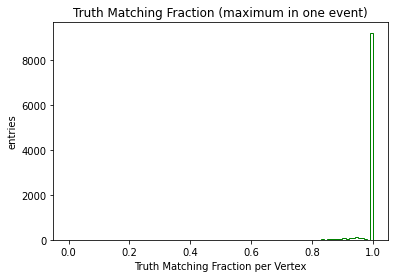

time_elapsed 0.972074031829834 seconds


In [9]:
time_start = time.time()
fig_vtx, ax_vtx = plt.subplots()
fig_event, ax_event = plt.subplots()

m_event, m_vtx = [], []
for l in range(len(truth_match_matrix)):
    m_event.append(np.amax(truth_match_matrix[l]))
    for j in range(len(truth_match_matrix[l])):
        m_vtx.append(max(truth_match_matrix[l][j]))
        
(mean, stadev) = norm.fit(m_event)
print('mean_event=', mean)
print('standard deviation_event=', stadev)
bin = np.linspace(0, 1, 101)
ax_event.hist(m_event, bins=bin, color='green', histtype='step', label='number of vertex')
ax_vtx.hist(m_vtx, bins=bin, color='green', histtype='step')

ax_event.set_title('Truth Matching Fraction (maximum in one event)')
ax_vtx.set_title('Truth Matching Fraction (all vertex fractions)')

ax_event.set_xlabel("Truth Matching Fraction per Vertex")
ax_event.set_ylabel("entries")

ax_vtx.set_xlabel("Truth Matching Fraction per Vertex")
ax_vtx.set_ylabel("entries")

plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [10]:
start = time.time()

# define variables
event_size = 10000
truth_d0, truth_z0, truth_phi, truth_theta, truth_qp, truth_trk_vtxid = branches_truth['truth_vtx_fitted_trk_d0'], branches_truth['truth_vtx_fitted_trk_z0'], branches_truth['truth_vtx_fitted_trk_phi'], branches_truth['truth_vtx_fitted_trk_theta'], branches_truth['truth_vtx_fitted_trk_qp'], branches_truth['truth_vtx_fitted_trk_vtxID']
reco_d0, reco_z0, reco_phi, reco_theta, reco_qp, reco_trk_vtxid  = branches_reco['reco_vtx_fitted_trk_d0'], branches_reco['reco_vtx_fitted_trk_z0'], branches_reco['reco_vtx_fitted_trk_phi'], branches_reco['reco_vtx_fitted_trk_theta'], branches_reco['reco_vtx_fitted_trk_qp'], branches_reco['reco_vtx_fitted_trk_vtxID']
truth_trk_info, reco_trk_info, truth_match_matrix = [], [], []

# reshape the data into shape(:, 5)
for i in range(1):
    num_trk_truth = np.bincount(truth_trk_vtxid[i])
    truth_trk_info_tmp = np.vstack([truth_d0[i], truth_z0[i], truth_phi[i], truth_theta[i], truth_qp[i]]).transpose()
    truth_trk_info_tmp = np.split(truth_trk_info_tmp, np.cumsum(num_trk_truth))
    truth_trk_info_tmp = truth_trk_info_tmp[:-1]
    #truth_trk_info.append(truth_trk_info_tmp)
    
    num_trk_reco = np.bincount(reco_trk_vtxid[i])
    reco_trk_info_tmp = np.vstack([reco_d0[i], reco_z0[i], reco_phi[i], reco_theta[i], reco_qp[i]]).transpose()
    reco_trk_info_tmp = np.split(reco_trk_info_tmp, np.cumsum(num_trk_reco))
    reco_trk_info_tmp = reco_trk_info_tmp[:-1]
    #reco_trk_info.append(reco_trk_info_tmp)
    
    match_matrix = np.zeros((len(truth_trk_info_tmp), len(reco_trk_info_tmp)))
    for j in range(len(truth_trk_info_tmp)):
        for k in range(len(reco_trk_info_tmp)):
            a, b = np.array(truth_trk_info_tmp[j]), np.array(reco_trk_info_tmp[k])
            m, n = a.shape
            dtype={'names':['f{}'.format(i) for i in range(n)], 'formats':n * [a.dtype]}

            print(np.intersect1d(a.view(dtype), b.view(dtype))).reshape(-1, n)
            
            match_matrix[j, k] = len(np.intersect1d(av, bv).view(a.dtype).reshape(-1, a.shape[1]))/len(a)
    truth_match_matrix.append(match_matrix)

    
end = time.time()
print(end-start, 'seconds')

/tmp/ipykernel_54/3212474528.py:30: DeprecationWarning: Changing the shape of an F-contiguous array by descriptor assignment is deprecated. To maintain the Fortran contiguity of a multidimensional Fortran array, use 'a.T.view(...).T' instead
  print(np.intersect1d(a.view(dtype), b.view(dtype))).reshape(-1, n)


ValueError: When changing to a larger dtype, its size must be a divisor of the total size in bytes of the last axis of the array.

In [11]:
a=np.array([[5, 6, 3],
   [8, 1, 0],
   [2, 1, 4],
   [8, 0, 6],
   [6, 7, 6]])
b=np.array([[2, 1, 4],
   [2, 1, 4],
   [6, 7, 6],
   [5, 6, 3],
   [0, 0, 0]])

In [12]:
av = a.view([('', a.dtype)] * a.shape[1]).ravel()
print(av)
bv = b.view([('', b.dtype)] * b.shape[1]).ravel()
np.intersect1d(av, bv).view(a.dtype).reshape(-1, a.shape[1])

[(5, 6, 3) (8, 1, 0) (2, 1, 4) (8, 0, 6) (6, 7, 6)]


array([[2, 1, 4],
       [5, 6, 3],
       [6, 7, 6]])